In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Input layer (28 * 28) -> 784
model.add(tf.keras.layers.Dense(128, activation='relu')) # Dense layer 1
model.add(tf.keras.layers.Dense(128, activation='relu')) # Dense layer 2
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2608 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1061 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0729 - accuracy: 0.9769


In [13]:
model.save('handwritten.model')

In [14]:
my_model = tf.keras.models.load_model('handwritten.model')

In [15]:
loss, accuracy = my_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9692


In [16]:
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  0.09718617796897888
Accuracy:  0.9692000150680542


## Now using own example.

1/1 [==============================] - 0s 105ms/step
The digit is probably a 0


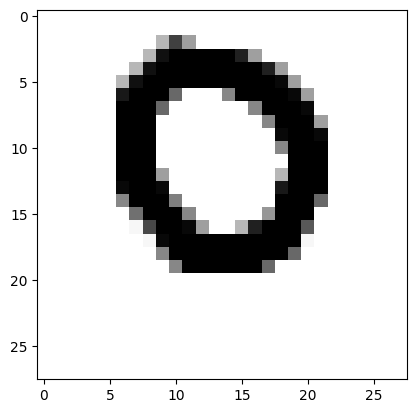

1/1 [==============================] - 0s 94ms/step
The digit is probably a 1


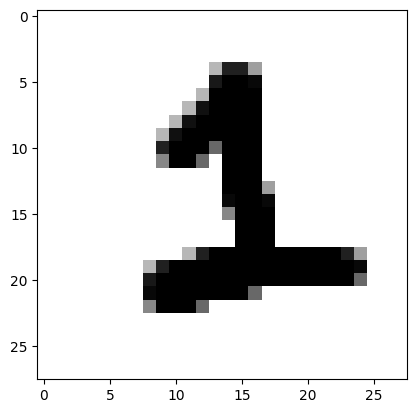

1/1 [==============================] - 0s 42ms/step
The digit is probably a 2


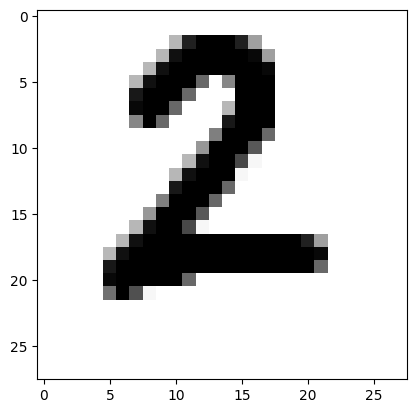

1/1 [==============================] - 0s 40ms/step
The digit is probably a 3


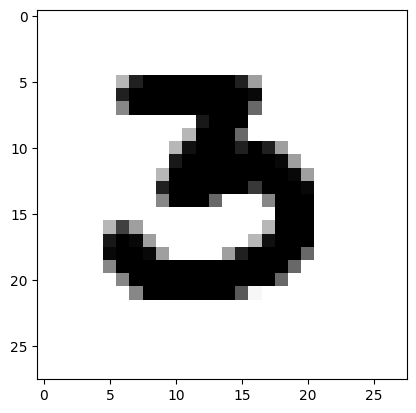

1/1 [==============================] - 0s 33ms/step
The digit is probably a 4


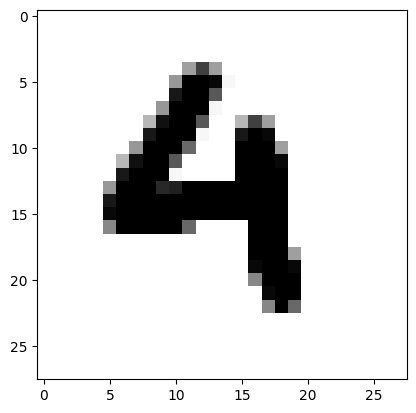

1/1 [==============================] - 0s 33ms/step
The digit is probably a 3


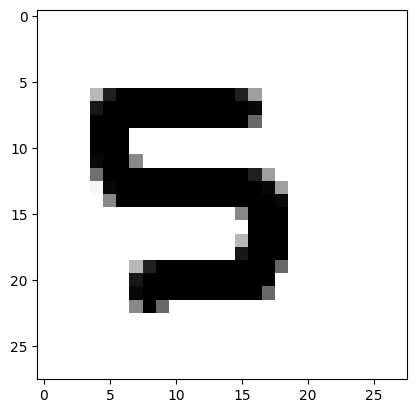

1/1 [==============================] - 0s 83ms/step
The digit is probably a 5


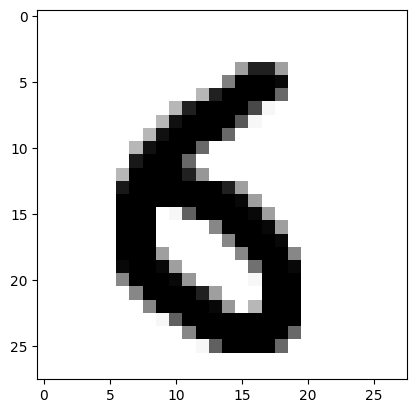

1/1 [==============================] - 0s 121ms/step
The digit is probably a 7


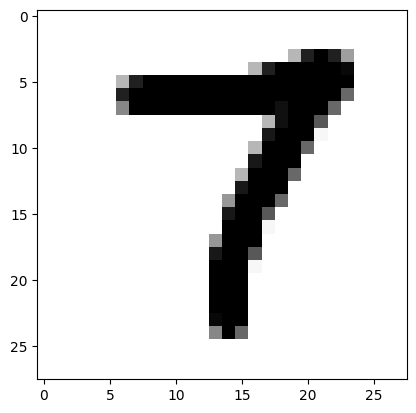

1/1 [==============================] - 0s 88ms/step
The digit is probably a 8


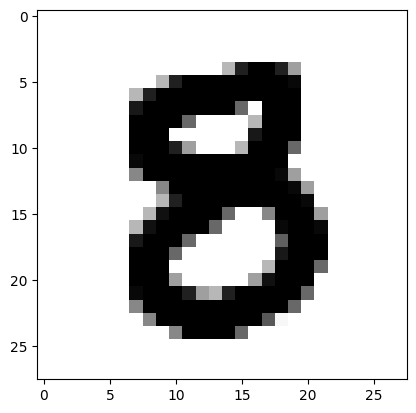

1/1 [==============================] - 0s 39ms/step
The digit is probably a 3


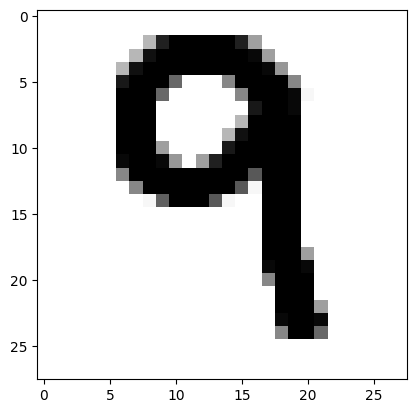

In [17]:
for i in range(0, 10):
  filename = f"digits/digit_{i}.png"
  try:
    img = cv2.imread(filename)[:,:,0]
    img = np.invert(np.array([img]))
    pred = my_model.predict(img)
    print(f"The digit is probably a {np.argmax(pred)}")
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
  except:
    print("Error")